## 1.6 Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.
The deadline for submitting is ***23 May 2022, 17:00 CET (Monday)***. After that, the form will be closed.



## Q1. Downloading the data
We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records".

Download the data for January and February 2021.

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

Read the data for January. How many records are there?



In [1]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
fhv_df=pd.read_parquet("C:/Users/Dell/Desktop/CEDAT/MPSE/DTZC/MLOP/wk1/data/fhv_tripdata_2021-01.parquet")
fhv_df.shape

(1154112, 7)

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

What's the average trip duration in January?


In [3]:
fhv_df.head(3)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013


In [4]:
fhv_df['duration'] = fhv_df.dropOff_datetime - fhv_df.pickup_datetime
fhv_df.duration = fhv_df.duration.apply(lambda td: td.total_seconds() / 60)
fhv_df.head(3)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.0
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.0
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.0


In [5]:
duration = fhv_df.duration
duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

In [6]:
avg_trip=statistics.mean(duration)
avg_trip

19.167224093791013

## Data preparation

Check the distribution of the duration variable. There are some outliers. 

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop? 

In [7]:
#box plot
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()


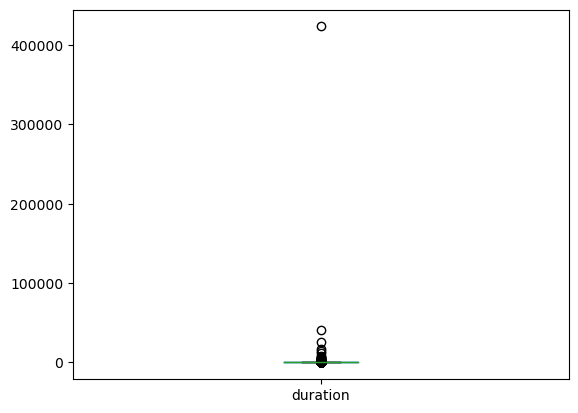

In [8]:
plot_boxplot(fhv_df,"duration")

In [9]:
# remove outliers
def outliers(df, ft):
    Q1 = df[ft].quantile(0.30)
    Q3 = df[ft].quantile(0.70)
    IQR= Q3 - Q1
    
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    ls = df.index[(df[ft]<lower_bound) |(df[ft]> upper_bound) ]
    
    return ls

In [10]:
# create an empty list to store the output indices from multiple columns

index_list = [] 
for feature in ["duration"]:
    index_list.extend(outliers(fhv_df, feature))


In [11]:
index_list

[2,
 16,
 45,
 46,
 58,
 147,
 157,
 198,
 199,
 221,
 275,
 288,
 312,
 314,
 324,
 327,
 331,
 339,
 342,
 344,
 347,
 349,
 350,
 352,
 360,
 362,
 363,
 365,
 369,
 372,
 376,
 377,
 379,
 381,
 387,
 393,
 396,
 397,
 398,
 422,
 520,
 573,
 581,
 582,
 607,
 608,
 659,
 662,
 664,
 665,
 674,
 718,
 727,
 738,
 789,
 797,
 816,
 929,
 967,
 1003,
 1007,
 1015,
 1056,
 1059,
 1108,
 1119,
 1137,
 1277,
 1316,
 1368,
 1495,
 1497,
 1502,
 1599,
 1615,
 1640,
 1720,
 1744,
 1747,
 1750,
 1807,
 1942,
 2062,
 2177,
 2180,
 2247,
 2267,
 2273,
 2388,
 2393,
 2398,
 2449,
 2509,
 2519,
 2529,
 2538,
 2539,
 2568,
 2757,
 2768,
 2839,
 2861,
 2862,
 2901,
 2961,
 2973,
 2991,
 3011,
 3039,
 3111,
 3159,
 3160,
 3162,
 3191,
 3192,
 3279,
 3359,
 3460,
 3497,
 3576,
 3581,
 3758,
 3772,
 3783,
 3834,
 3907,
 3924,
 3972,
 4009,
 4173,
 4286,
 4299,
 4344,
 4364,
 4367,
 4371,
 4427,
 4463,
 4469,
 4491,
 4551,
 4624,
 4625,
 4688,
 4738,
 4751,
 4759,
 4776,
 4778,
 4779,
 4815,
 4826,
 

In [12]:
#remove outliers
def remove (df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [13]:
df_cleaned = remove(fhv_df, index_list)
df_cleaned.shape

(1045679, 8)

In [14]:
duration_cleaned=df_cleaned.duration
duration_cleaned.shape

(1045679,)

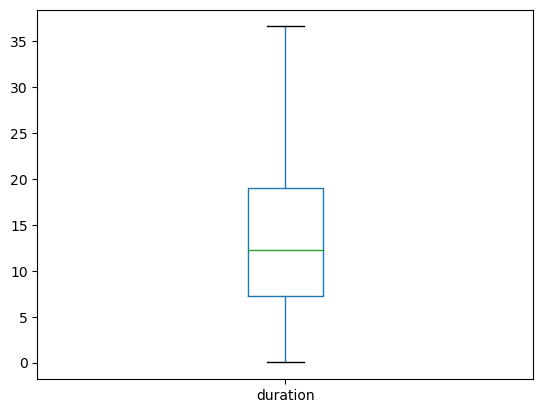

In [15]:
plot_boxplot(df_cleaned,"duration")

In [16]:
duration.shape

(1154112,)

In [17]:
records_dropped =1154112 - 1045679
records_dropped

108433

## Q3. Missing values

The features we'll use for our model are the pickup and dropoff location IDs. 

But they have a lot of missing values there. Let's replace them with "-1".
What's the fractions of missing values for the pickup location ID? I.e. fraction of "-1"s after you filled the NAs.


In [18]:
fhv_df.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               958267
DOlocationID               162220
SR_Flag                   1154112
Affiliated_base_number        885
duration                        0
dtype: int64

In [19]:
PUlocationID=fhv_df["PUlocationID"]
PUlocationID.fillna(-1, inplace=True)

In [20]:
DOlocationID=fhv_df["DOlocationID"]
DOlocationID.fillna(-1, inplace=True)

In [21]:
fhv_df.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID                    0
DOlocationID                    0
SR_Flag                   1154112
Affiliated_base_number        885
duration                        0
dtype: int64

In [22]:
PUlocationID_fraction = (958267/1154112)*100
print("PUlocationID_fraction:",round(PUlocationID_fraction,1),"%")

PUlocationID_fraction: 83.0 %


## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix? (The number of columns).


In [23]:
fhv_df_ohe = fhv_df.drop(columns=["dispatching_base_num","pickup_datetime","pickup_datetime","SR_Flag","dropOff_datetime","Affiliated_base_number","duration"])
fhv_df_ohe.shape

(1154112, 2)

In [24]:
train_dicts = fhv_df[fhv_df_ohe.columns].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [25]:
X_train.shape

(1154112, 2)

dimensionality of this matrix(The number of columns)=2 columns

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

What's the RMSE on train?


In [26]:
fhv_df_ohe['duration']=fhv_df["duration"]
fhv_df_ohe.columns

Index(['PUlocationID', 'DOlocationID', 'duration'], dtype='object')

In [27]:
fhv_df["SR_Flag"].fillna(0, inplace=True)                   
fhv_df["Affiliated_base_number"].fillna(0, inplace=True)       

In [28]:
train_dicts = fhv_df[fhv_df_ohe.columns].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


target = 'duration'
y_train = fhv_df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

9.68457746596307e-08

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (Feb 2021). 

What's the RMSE on validation?


In [29]:
val_df =pd.read_parquet("C:/Users/Dell/Desktop/CEDAT/MPSE/DTZC/MLOP/wk1/data/fhv_tripdata_2021-02.parquet")



In [30]:
val_df.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               884691
DOlocationID               152352
SR_Flag                   1037692
Affiliated_base_number          0
dtype: int64

In [31]:
val_df["SR_Flag"].fillna(0, inplace=True)                   
val_df["Affiliated_base_number"].fillna(0, inplace=True)
val_df["DOlocationID"].fillna(-1, inplace=True)
val_df["PUlocationID"].fillna(-1, inplace=True)

In [32]:
val_df['duration'] = val_df.dropOff_datetime - val_df.pickup_datetime
val_df.duration = val_df.duration.apply(lambda td: td.total_seconds() / 60)
val_df.head(3)

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,-1.0,-1.0,0,B00014,92.000000
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,0,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,0,B00021,14.566667


In [33]:
y_fhv_val=val_df.duration
y_fhv_val.shape

(1037692,)

In [34]:
X_fhv_val=val_df.drop(columns=["dispatching_base_num","pickup_datetime","pickup_datetime","SR_Flag","dropOff_datetime","Affiliated_base_number"])
X_fhv_val.shape

(1037692, 3)

In [35]:
y_pred2 = lr.predict(X_fhv_val)
y_pred2.shape

C:\Users\Dell\miniconda3\envs\firstEnv\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


(1037692,)

In [36]:
y_fhv_val=val_df.duration
y_fhv_val.shape

(1037692,)

In [37]:
mean_squared_error(y_fhv_val, y_pred2, squared=False)

3.913634458571888e-08